In [2]:
from sympy import *

In [24]:
r, mu, alpha,beta , nu, psi = symbols('r mu alpha beta nu psi')

In [232]:
eqpsi0 = (1+r**2)/(2*r)*(mu*r*sin(alpha)-nu*sin(psi-alpha)) - mu*sin(alpha) - nu*r*sin(psi+alpha)
eqpsi1 = eqpsi0.subs(alpha,pi/2 - beta)

eqr0 = (1-r**2)/(2)*(mu*r*cos(alpha)+nu*cos(psi-alpha))
eqr1 = eqr0.subs(alpha,pi/2 - beta)

In [234]:
A_ans = (sin(beta+psi) + r*sin(beta)) / (sin(beta+psi) - r*sin(beta))
A = symbols('A')
mu1 = (1+A)/2
nu1 = (1-A)/2

eq_psi = eqpsi1.subs(nu,nu1).subs(mu,mu1).simplify()
eq_r = eqr1.subs(nu,nu1).subs(mu,mu1).simplify()

In [235]:
eq_r

In [236]:
eq_r

In [237]:
EQ = Eq(0,eq_psi)

In [238]:
d_rr =eqr1.diff(r).simplify()
d_rpsi =eqr1.diff(psi).simplify()


d_psir =eqpsi1.diff(r).simplify()
d_psipsi =eqpsi1.diff(psi).simplify()


In [239]:
SOL_r = solve(eq_psi.subs(A,A_ans).simplify(),r)[1]

In [284]:

A_ans = (sin(beta+psi) + r*sin(beta)) / (sin(beta+psi) - r*sin(beta))
# A = symbols('A')
mu2 = (1+A_ans)/2
nu2 = (1-A_ans)/2

eq11 = eqr1.diff(r).subs([(mu,mu2),(nu,nu2)]).simplify()
eq12 = eqr1.diff(psi).subs([(mu,mu2),(nu,nu2)]).simplify()
eq21 = eqpsi1.diff(r).subs([(mu,mu2),(nu,nu2)]).simplify()
eq22 = eqpsi1.diff(psi).subs([(mu,mu2),(nu,nu2)]).simplify()
J = Matrix([[eq11,eq12],[eq21,eq22]])

In [290]:
print_latex(J)

\left[\begin{matrix}\frac{\left(\frac{r^{2}}{2} - \frac{1}{2}\right) \sin{\left(\beta \right)} \sin{\left(\beta + \psi \right)}}{r \sin{\left(\beta \right)} - \sin{\left(\beta + \psi \right)}} & \frac{r \left(1 - r^{2}\right) \sin{\left(\beta \right)} \cos{\left(\beta + \psi \right)}}{2 \left(r \sin{\left(\beta \right)} - \sin{\left(\beta + \psi \right)}\right)}\\- \frac{3 r^{2} \sin{\left(\beta \right)} \cos{\left(\beta - \psi \right)} + 2 r^{2} \sin{\left(\psi \right)} \cos^{2}{\left(\beta \right)} + \sin{\left(\beta \right)} \cos{\left(\beta + \psi \right)}}{2 r \left(r \sin{\left(\beta \right)} - \sin{\left(\beta + \psi \right)}\right)} & \frac{\left(- 2 r^{2} \sin{\left(\beta - \psi \right)} + \left(- r^{2} - 1\right) \sin{\left(\beta + \psi \right)}\right) \sin{\left(\beta \right)}}{2 \left(r \sin{\left(\beta \right)} - \sin{\left(\beta + \psi \right)}\right)}\end{matrix}\right]


In [282]:

A_ans = (sin(beta+psi) + r*sin(beta)) / (sin(beta+psi) - r*sin(beta))
# A = symbols('A')
mu2 = (1+A_ans)/2
nu2 = (1-A_ans)/2

eq11 = eqr1.diff(r).simplify()
eq12 = eqr1.diff(psi).simplify()
eq21 = eqpsi1.diff(r).simplify()
eq22 = eqpsi1.diff(psi).simplify()
J = Matrix([[eq11,eq12],[eq21,eq22]])

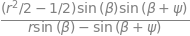

In [295]:
eqr1.diff(r).subs([(mu,mu2),(nu,nu2)]).simplify()

In [277]:
J = Matrix([[d_rr,d_rpsi],[d_psir,d_psipsi]])

In [286]:
J_DET =  J.det().factor()

In [308]:
print_latex(solve(J_DET,r))

\left[ -1, \  1, \  - \sqrt{- \frac{\sin{\left(\beta \right)}}{\sin{\left(\beta - 2 \psi \right)} + 2 \sin{\left(\beta + 2 \psi \right)}}}, \  \sqrt{- \frac{\sin{\left(\beta \right)}}{\sin{\left(\beta - 2 \psi \right)} + 2 \sin{\left(\beta + 2 \psi \right)}}}\right]


In [306]:
TEMP = J_DET.subs(mu,(1+A_ans)/2).subs(nu,(1-A_ans)/2).factor().factor(r)#.simplify().factor()

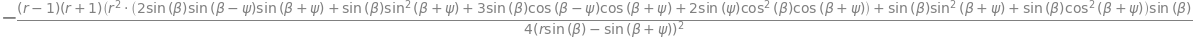

In [307]:
TEMP

In [305]:
print_latex(TEMP)

- \frac{\left(r - 1\right) \left(r + 1\right) \left(2 r^{2} \sin{\left(\beta \right)} \sin{\left(\beta - \psi \right)} \sin{\left(\beta + \psi \right)} + r^{2} \sin{\left(\beta \right)} \sin^{2}{\left(\beta + \psi \right)} + 3 r^{2} \sin{\left(\beta \right)} \cos{\left(\beta - \psi \right)} \cos{\left(\beta + \psi \right)} + 2 r^{2} \sin{\left(\psi \right)} \cos^{2}{\left(\beta \right)} \cos{\left(\beta + \psi \right)} + \sin{\left(\beta \right)} \sin^{2}{\left(\beta + \psi \right)} + \sin{\left(\beta \right)} \cos^{2}{\left(\beta + \psi \right)}\right) \sin{\left(\beta \right)}}{4 \left(r \sin{\left(\beta \right)} - \sin{\left(\beta + \psi \right)}\right)^{2}}


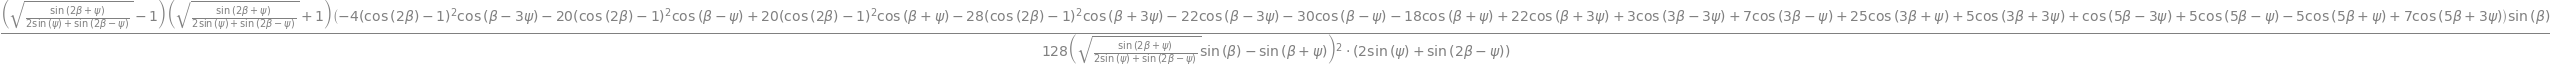

In [281]:
TEMP.subs(r,SOL_r).simplify()

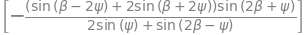

In [303]:
solve(Eq(solve(Eq(0,TEMP),r)[2],SOL_r),sin(beta))

In [197]:
J_SUB = J.subs(r,SOL_r).subs(A,A_ans)
J_sim = Matrix([[J_SUB[0].simplify(),J_SUB[1].simplify()],[J_SUB[2].simplify(),J_SUB[3].simplify()]]) 

In [198]:
J_SUB

⎡                                                   _________________________ 
⎢                                                  ╱       sin(2⋅β + ψ)       
⎢                                                 ╱  ─────────────────────── ⋅
⎢                                               ╲╱   2⋅sin(ψ) + sin(2⋅β - ψ)  
⎢                                             - ──────────────────────────────
⎢                                                                             
⎢                                                                             
⎢    _________________________              _________________________         
⎢   ╱       sin(2⋅β + ψ)                   ╱       sin(2⋅β + ψ)               
⎢  ╱  ─────────────────────── ⋅cos(β)     ╱  ─────────────────────── ⋅(r⋅sin(β
⎢╲╱   2⋅sin(ψ) + sin(2⋅β - ψ)           ╲╱   2⋅sin(ψ) + sin(2⋅β - ψ)          
⎢──────────────────────────────────── + ──────────────────────────────────────
⎢                 2                                 

In [199]:
J_SIM_DET = J_sim.det().simplify()

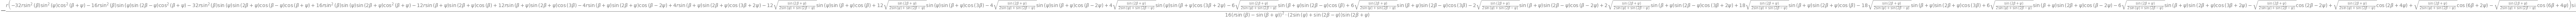

In [200]:
J_SIM_DET.factor()

In [156]:
J_det = JJ.det().simplify()

In [159]:
SOL_r = solve(eq_psi.subs(A,A_ans).simplify(),r)[1]

In [161]:
SOL_J_det = J_det.subs(r,SOL_r)

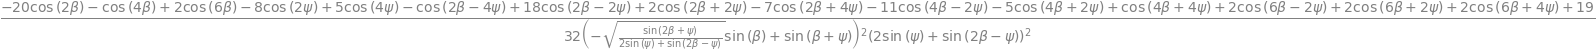

In [163]:
SOL_J_det.simplify()

In [375]:
acos(psi).series(psi,0,20)

In [363]:
eq_br = sin(beta)*(sin(2*beta-psi)+2*sin(psi)) + sin(2*beta+psi)*(sin(beta-2*psi)+2*sin(beta+2*psi))
POLY = eq_br.series(psi,0,3)

In [368]:
solve(POLY,psi)

KeyboardInterrupt: 

In [347]:
SOL_BP =  series(eq_br,beta).removeO()

In [361]:
solve